# COVID-19 Analysis

This Jupyter Notebook is for exploring trends in collected data for the ongoing COVID-19 pandemic.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for Study
df_STATES = pd.read_csv("https://covidtracking.com/data/download/all-states-history.csv");
df_NATIONWIDE = pd.read_csv("https://covidtracking.com/data/download/national-history.csv");

print('Datasets uploaded!');

Datasets uploaded!


In [3]:
# Open US National Dataset and Display 1st 5 rows
df_NATIONWIDE.head()

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,posNeg,positive,positiveIncrease,recovered,states,totalTestResults,totalTestResultsIncrease
0,20200827,172731.0,1129,17181.0,7717.0,1668,37464.0,365993.0,68954986,698076,1831.0,2125.0,74792493,5837507,44264,2101326.0,56,74792493,742340
1,20200826,171602.0,1249,17046.0,7763.0,1873,38411.0,364325.0,68256910,631672,1809.0,2142.0,74050153,5793243,43130,2084465.0,56,74050153,674802
2,20200825,170353.0,1147,16920.0,7851.0,1999,38762.0,362452.0,67625238,597782,1789.0,2163.0,73375351,5750113,36320,2053699.0,56,73375351,634102
3,20200824,169206.0,343,16787.0,7836.0,1049,38657.0,360453.0,67027456,648010,1764.0,2118.0,72741249,5713793,34641,2020774.0,56,72741249,682651
4,20200823,168863.0,572,16697.0,7951.0,774,39029.0,359404.0,66379446,577947,1737.0,2131.0,72058598,5679152,37567,1997782.0,56,72058598,615514


In [4]:
# Open States Dataset and Display 1st 5 rows
df_STATES.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,20200827,WY,B,37.0,NaN,0,NaN,215.0,215.0,13.0,...,74532.0,3954,NaN,NaN,NaN,NaN,73976.0,3993,104738.0,502
1,20200827,NE,A,386.0,NaN,3,NaN,1954.0,1954.0,166.0,...,348575.0,3815,NaN,NaN,NaN,NaN,349055.0,3812,NaN,0
2,20200827,ND,A,118.0,114.0,1,4.0,534.0,534.0,61.0,...,196559.0,1441,8329.0,NaN,NaN,NaN,196559.0,1441,449865.0,6969
3,20200827,NC,A+,2630.0,2630.0,24,NaN,NaN,NaN,958.0,...,2152725.0,31724,NaN,NaN,NaN,NaN,NaN,0,2152725.0,31724
4,20200827,MT,C,98.0,NaN,0,NaN,412.0,412.0,119.0,...,240659.0,2399,NaN,NaN,NaN,NaN,NaN,0,240659.0,2399


## Data Cleaning

First, let us get an understanding of the characteristics of these datasets. We'll start with the US National dataset.

In [5]:
# Characteristics of the US National Dataset
df_NATIONWIDE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 19 columns):
date                        219 non-null int64
death                       200 non-null float64
deathIncrease               219 non-null int64
inIcuCumulative             156 non-null float64
inIcuCurrently              155 non-null float64
hospitalizedIncrease        219 non-null int64
hospitalizedCurrently       164 non-null float64
hospitalizedCumulative      177 non-null float64
negative                    219 non-null int64
negativeIncrease            219 non-null int64
onVentilatorCumulative      149 non-null float64
onVentilatorCurrently       156 non-null float64
posNeg                      219 non-null int64
positive                    219 non-null int64
positiveIncrease            219 non-null int64
recovered                   156 non-null float64
states                      219 non-null int64
totalTestResults            219 non-null int64
totalTestResultsIncrease    219 n

Given that some of these features have 'NULL' values, let's take a closer look.

In [6]:
# Find 'NULL' values in US National Dataset
df_NATIONWIDE.isnull().sum()

date                         0
death                       19
deathIncrease                0
inIcuCumulative             63
inIcuCurrently              64
hospitalizedIncrease         0
hospitalizedCurrently       55
hospitalizedCumulative      42
negative                     0
negativeIncrease             0
onVentilatorCumulative      70
onVentilatorCurrently       63
posNeg                       0
positive                     0
positiveIncrease             0
recovered                   63
states                       0
totalTestResults             0
totalTestResultsIncrease     0
dtype: int64

Since there are so few 'NULL' values, it is reasonable to assume these are actually '0' values. Hence, we should modify them accordingly.

In [7]:
# Convert 'NULL' values to 0 in US National Dataset
df_NATIONWIDE['death'].fillna(0, inplace = True)
df_NATIONWIDE['inIcuCumulative'].fillna(0, inplace = True)
df_NATIONWIDE['inIcuCurrently'].fillna(0, inplace = True)
df_NATIONWIDE['hospitalizedCurrently'].fillna(0, inplace = True)
df_NATIONWIDE['hospitalizedCumulative'].fillna(0, inplace = True)
df_NATIONWIDE['onVentilatorCumulative'].fillna(0, inplace = True)
df_NATIONWIDE['onVentilatorCurrently'].fillna(0, inplace = True)
df_NATIONWIDE['recovered'].fillna(0, inplace = True)

df_NATIONWIDE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 19 columns):
date                        219 non-null int64
death                       219 non-null float64
deathIncrease               219 non-null int64
inIcuCumulative             219 non-null float64
inIcuCurrently              219 non-null float64
hospitalizedIncrease        219 non-null int64
hospitalizedCurrently       219 non-null float64
hospitalizedCumulative      219 non-null float64
negative                    219 non-null int64
negativeIncrease            219 non-null int64
onVentilatorCumulative      219 non-null float64
onVentilatorCurrently       219 non-null float64
posNeg                      219 non-null int64
positive                    219 non-null int64
positiveIncrease            219 non-null int64
recovered                   219 non-null float64
states                      219 non-null int64
totalTestResults            219 non-null int64
totalTestResultsIncrease    219 n

While we no longer have 'NULL' values, many of the values have non-numeric values (i.e. 'NONE'). Let's convert those to 0 as well.

In [8]:
# Replace all non-numeric values with 0.
df_NATIONWIDE['death'].replace("NONE", 0, inplace=True)
df_NATIONWIDE['inIcuCumulative'].replace("NONE", 0, inplace=True)
df_NATIONWIDE['inIcuCurrently'].replace("NONE", 0, inplace=True)
df_NATIONWIDE['hospitalizedCurrently'].replace("NONE", 0, inplace=True)
df_NATIONWIDE['hospitalizedCumulative'].replace("NONE", 0, inplace=True)
df_NATIONWIDE['onVentilatorCumulative'].replace("NONE", 0, inplace=True)
df_NATIONWIDE['onVentilatorCurrently'].replace("NONE", 0, inplace=True)
df_NATIONWIDE['recovered'].replace("NONE", 0, inplace=True)

df_NATIONWIDE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 19 columns):
date                        219 non-null int64
death                       219 non-null float64
deathIncrease               219 non-null int64
inIcuCumulative             219 non-null float64
inIcuCurrently              219 non-null float64
hospitalizedIncrease        219 non-null int64
hospitalizedCurrently       219 non-null float64
hospitalizedCumulative      219 non-null float64
negative                    219 non-null int64
negativeIncrease            219 non-null int64
onVentilatorCumulative      219 non-null float64
onVentilatorCurrently       219 non-null float64
posNeg                      219 non-null int64
positive                    219 non-null int64
positiveIncrease            219 non-null int64
recovered                   219 non-null float64
states                      219 non-null int64
totalTestResults            219 non-null int64
totalTestResultsIncrease    219 n

We still have two data types: integers and float-32 bits. Let's convert all the data into either integer-64bit or floating-64bit.

In [9]:
# Convert Integers to Floats
df_NATIONWIDE['death'].astype(int)
df_NATIONWIDE['inIcuCumulative'].astype(int)
df_NATIONWIDE['inIcuCurrently'].astype(int)
df_NATIONWIDE['hospitalizedCurrently'].astype(int)
df_NATIONWIDE['hospitalizedCumulative'].astype(int)
df_NATIONWIDE['onVentilatorCumulative'].astype(int)
df_NATIONWIDE['onVentilatorCurrently'].astype(int)
df_NATIONWIDE['recovered'].astype(int)

df_NATIONWIDE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 19 columns):
date                        219 non-null int64
death                       219 non-null float64
deathIncrease               219 non-null int64
inIcuCumulative             219 non-null float64
inIcuCurrently              219 non-null float64
hospitalizedIncrease        219 non-null int64
hospitalizedCurrently       219 non-null float64
hospitalizedCumulative      219 non-null float64
negative                    219 non-null int64
negativeIncrease            219 non-null int64
onVentilatorCumulative      219 non-null float64
onVentilatorCurrently       219 non-null float64
posNeg                      219 non-null int64
positive                    219 non-null int64
positiveIncrease            219 non-null int64
recovered                   219 non-null float64
states                      219 non-null int64
totalTestResults            219 non-null int64
totalTestResultsIncrease    219 n

Let's make sure we have no NA/NaN values.

In [10]:
#Remove any NA/NaN values
df_NATIONWIDE = df_NATIONWIDE[df_NATIONWIDE.notna()]
df_NATIONWIDE.tail()

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,posNeg,positive,positiveIncrease,recovered,states,totalTestResults,totalTestResultsIncrease
214,20200126,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,1,0,0
215,20200125,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,1,0,0
216,20200124,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,1,0,0
217,20200123,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,1,0,0
218,20200122,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,1,0,0


As a final step, let's create an index for the dates.

In [11]:
# Create an alternate index for the dates (since the data starts with the most recent values)
df_NATIONWIDE = df_NATIONWIDE[::-1].reset_index();

Now that we have the US National Dataset cleaned, let's repeat the process for the individual states.

In [12]:
# Characteristics of the States' Dataset
df_STATES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 42 columns):
date                                9841 non-null int64
state                               9841 non-null object
dataQualityGrade                    8716 non-null object
death                               9149 non-null float64
deathConfirmed                      3607 non-null float64
deathIncrease                       9841 non-null int64
deathProbable                       2488 non-null float64
hospitalized                        5444 non-null float64
hospitalizedCumulative              5444 non-null float64
hospitalizedCurrently               7154 non-null float64
hospitalizedIncrease                9841 non-null int64
inIcuCumulative                     1509 non-null float64
inIcuCurrently                      3842 non-null float64
negative                            9661 non-null float64
negativeIncrease                    9841 non-null int64
negativeTestsAntibody            

Given that some of these features have 'NULL' values, again let's take a closer look.

In [13]:
# Find 'NULL' values in States' Dataset
df_STATES.isnull().sum()

date                                   0
state                                  0
dataQualityGrade                    1125
death                                692
deathConfirmed                      6234
deathIncrease                          0
deathProbable                       7353
hospitalized                        4397
hospitalizedCumulative              4397
hospitalizedCurrently               2687
hospitalizedIncrease                   0
inIcuCumulative                     8332
inIcuCurrently                      5999
negative                             180
negativeIncrease                       0
negativeTestsAntibody               9138
negativeTestsPeopleAntibody         9507
negativeTestsViral                  8391
onVentilatorCumulative              9307
onVentilatorCurrently               6536
positive                              39
positiveCasesViral                  3178
positiveIncrease                       0
positiveScore                          0
positiveTestsAnt

Similarly as before, let us convert all the 'NULL' and non-numeric values to 0.

In [14]:
# Convert 'NULL' values to '0' in States' Dataset
df_STATES['dataQualityGrade'].fillna(0, inplace = True)
df_STATES['death'].fillna(0, inplace = True)
df_STATES['deathConfirmed'].fillna(0, inplace = True)
df_STATES['deathProbable'].fillna(0, inplace = True)
df_STATES['hospitalized'].fillna(0, inplace = True)
df_STATES['hospitalizedCumulative'].fillna(0, inplace = True)
df_STATES['hospitalizedCurrently'].fillna(0, inplace = True)
df_STATES['inIcuCumulative'].fillna(0, inplace = True)
df_STATES['inIcuCurrently'].fillna(0, inplace = True)
df_STATES['negative'].fillna(0, inplace = True)
df_STATES['negativeTestsAntibody'].fillna(0, inplace = True)
df_STATES['negativeTestsPeopleAntibody'].fillna(0, inplace = True)
df_STATES['negativeTestsViral'].fillna(0, inplace = True)
df_STATES['onVentilatorCumulative'].fillna(0, inplace = True)
df_STATES['onVentilatorCurrently'].fillna(0, inplace = True)
df_STATES['positive'].fillna(0, inplace = True)
df_STATES['positiveCasesViral'].fillna(0, inplace = True)
df_STATES['positiveTestsAntibody'].fillna(0, inplace = True)
df_STATES['positiveTestsAntigen'].fillna(0, inplace = True)
df_STATES['totalTestsPeopleAntibody'].fillna(0, inplace = True)
df_STATES['totalTestsPeopleAntigen'].fillna(0, inplace = True)
df_STATES['totalTestsPeopleViral'].fillna(0, inplace = True)
df_STATES['totalTestsViral'].fillna(0, inplace = True)

df_STATES.tail()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
9836,20200126,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,0.0,0.0,0.0,0,0.0,0
9837,20200125,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,0.0,0.0,0.0,0,0.0,0
9838,20200124,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,0.0,0.0,0.0,0,0.0,0
9839,20200123,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,0.0,0.0,0.0,0,0.0,0
9840,20200122,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,0.0,0.0,0.0,0,0.0,0


Let's drop all the NA/NaN values for the states dataset as well.

In [15]:
# Remove all the NA/NaN Values
df_STATES = df_STATES[df_STATES.notna()]
df_STATES.tail()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
9836,20200126,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,0.0,0.0,0.0,0,0.0,0
9837,20200125,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,0.0,0.0,0.0,0,0.0,0
9838,20200124,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,0.0,0.0,0.0,0,0.0,0
9839,20200123,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,0.0,0.0,0.0,0,0.0,0
9840,20200122,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,0.0,0.0,0.0,0,0.0,0


At this juncture, let's select the columns we believe we will need going forward.

In [16]:
# Feature Selection for States' Dataset
df_STATES = df_STATES[['date', 'state', 'dataQualityGrade', 'death', 'deathConfirmed', 'deathIncrease', 'deathProbable', 'hospitalized', 'hospitalizedCumulative', 
               'hospitalizedCurrently', 'hospitalizedIncrease', 'inIcuCumulative', 'inIcuCurrently', 'negative', 'negativeIncrease', 'negativeTestsAntibody', 
               'onVentilatorCumulative', 'onVentilatorCurrently', 'positiveCasesViral', 'positive', 'positiveIncrease', 'positiveTestsAntibody', 'positiveTestsAntigen', 
               'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen', 'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease', 'totalTestsViral', 'totalTestsViralIncrease']]

df_STATES.tail()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,positive,positiveIncrease,positiveTestsAntibody,positiveTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
9836,20200126,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
9837,20200125,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
9838,20200124,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
9839,20200123,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
9840,20200122,WA,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0


We have two object columns remaining: 'state' and 'dataQualityGrade'. Let's ensure we data for all 50 states and 6 territories/districts.

In [17]:
# Find the unique identifiers in the 'state' column and display them
df_STATESValues = df_STATES['state']
df_STATESValues.nunique()

56

We see we have 56 unique ID's in the array, so the 'state' column is accurate. Let's explore the 'dataQualityGrade' column.

In [18]:
# Find the unique identifiers in the 'dataQualityGrade' column from the States' dataset and display them
df_STATESDataQualityGrade = df_STATES['dataQualityGrade']
df_STATESDataQualityGrade.nunique()

7

We see that we have 7 unique identifiers. Let's see how many are valued at 0.

In [19]:
# Find number of rows that have no 'dataQualityGrade' in the States' dataset
df_STATES.groupby('dataQualityGrade').size()

dataQualityGrade
0     1125
A     2887
A+    2006
B     2605
C      850
D      338
F       30
dtype: int64

This result is very interesting. Out of the 9841 total rows, approximately 15.2% of the data either has no Quality grade or is less than a 'C' Quality. Let's convert the 'dataQualityGrade' column into separate columns for each of the grades. That change will allow use to conduct more analysis later.

In [20]:
# Drop all rows with values of '0', 'F' and 'D' from the States' dataset.

# Convert data Quality Grades into separate columns representing 'A', 'A+', 'B', 'C', 'D', 'F'
df_STATES[['A', 'A+', 'B', 'C', 'D', 'F', '0']] = pd.get_dummies(df_STATES['dataQualityGrade'])
df_STATES.drop(['dataQualityGrade'], axis=1, inplace=True)

df_STATES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 35 columns):
date                             9841 non-null int64
state                            9841 non-null object
death                            9841 non-null float64
deathConfirmed                   9841 non-null float64
deathIncrease                    9841 non-null int64
deathProbable                    9841 non-null float64
hospitalized                     9841 non-null float64
hospitalizedCumulative           9841 non-null float64
hospitalizedCurrently            9841 non-null float64
hospitalizedIncrease             9841 non-null int64
inIcuCumulative                  9841 non-null float64
inIcuCurrently                   9841 non-null float64
negative                         9841 non-null float64
negativeIncrease                 9841 non-null int64
negativeTestsAntibody            9841 non-null float64
onVentilatorCumulative           9841 non-null float64
onVentilatorCurrently 

Lastly, let's perform a similar operation by reverse indexing the values for the states dataset.

In [21]:
# Create an alternate index for the dates (since the data starts with the most recent values)
df_STATES = df_STATES[::-1].reset_index();

df_STATES.tail()

,index,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease,A,A+,B,C,D,F,0
9836,4,20200827,MT,98.0,0.0,0,0.0,412.0,412.0,119.0,...,0,240659.0,2399,0,0,0,0,1,0,0
9837,3,20200827,NC,2630.0,2630.0,24,0.0,0.0,0.0,958.0,...,0,2152725.0,31724,0,0,1,0,0,0,0
9838,2,20200827,ND,118.0,114.0,1,4.0,534.0,534.0,61.0,...,1441,449865.0,6969,0,1,0,0,0,0,0
9839,1,20200827,NE,386.0,0.0,3,0.0,1954.0,1954.0,166.0,...,3812,0.0,0,0,1,0,0,0,0,0
9840,0,20200827,WY,37.0,0.0,0,0.0,215.0,215.0,13.0,...,3993,104738.0,502,0,0,0,1,0,0,0


It appears at this juncture the data is sufficiently clean that we can begin analyzing it.

## Exploratory Data Analysis

As an initial part of our analysis, let's plot the recorded COVID-19 deaths as a function of the date using the US National dataset.

Text(0.5, 1.0, 'US Cumulative COVID-19 Deaths')

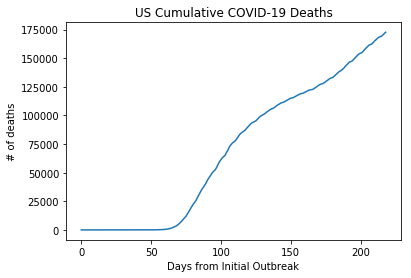

In [22]:
# Plot confirmed deaths as a function of date nationally

# Create the variables
df_NWDeathsConfirmed = df_NATIONWIDE[['death']]
df_NWDate = df_NATIONWIDE.index

# Plot the relationship
plt.plot(df_NWDate, df_NWDeathsConfirmed);
plt.xlabel('Days from Initial Outbreak')
plt.ylabel('# of deaths')
plt.title('US Cumulative COVID-19 Deaths')

Now that we know we have useable data, as confirmed by the graph above, let's do some exploring. Let's see if there is any correlation between the data quality and numbers of deaths and hospitalizations.

Text(0.5, 1.0, 'Data Quality - Death/Hospitalization Correlation Heatmap for COVID-19')

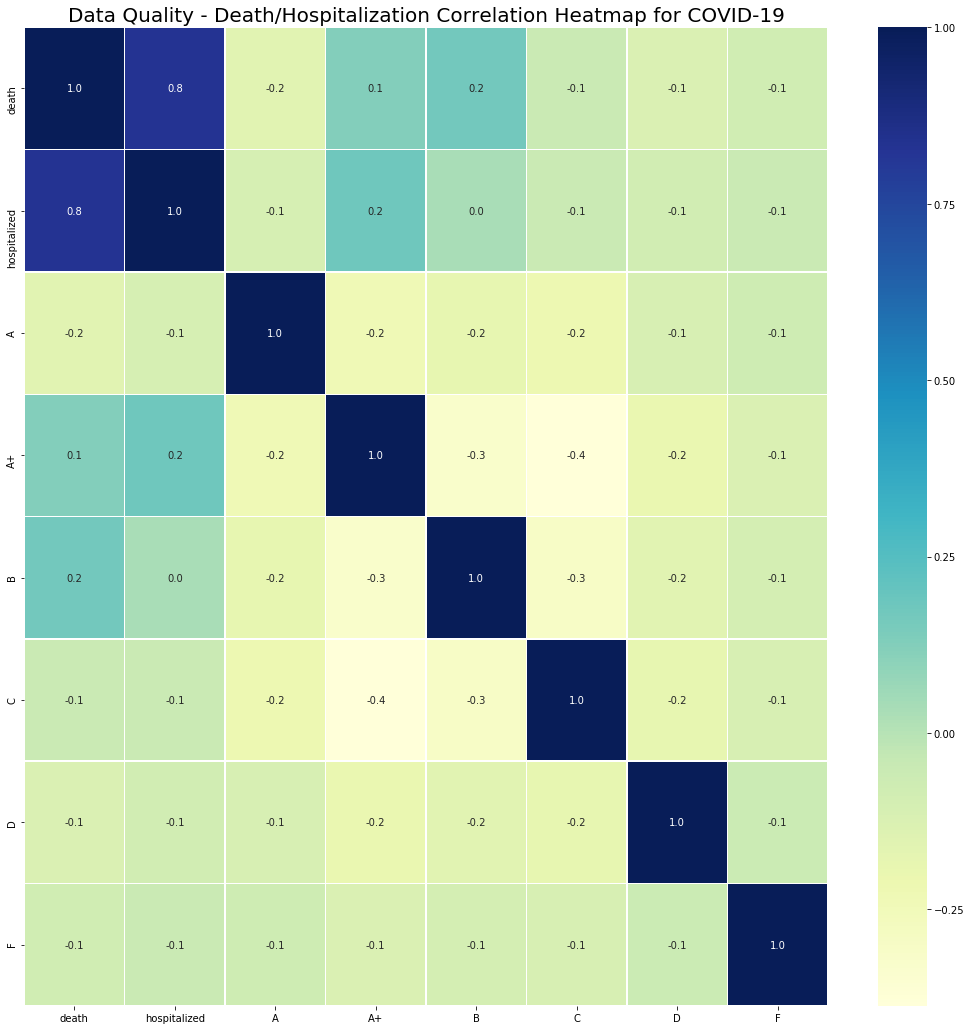

In [31]:
# Data Quality - Death/Hospitalization Matrix
# Select the features to do the analysis
df_ST_fs1 = df_STATES[['death', 'hospitalized', 'A', 'A+', 'B', 'C', 'D', 'F']]

# Create the Data Quality - Death/Hospitalization Matrix
figureQuality, axisQuality = plt.subplots(figsize=(18, 18));
sns.heatmap(df_ST_fs1.corr(), annot = True, linewidths = .5, fmt = '.01f', ax = axisQuality, cmap="YlGnBu");

plt.title('Data Quality - Death/Hospitalization Correlation Heatmap for COVID-19', fontsize = 20)

This plot is very interesting. It appears that when the data quality is high (i.e. A, A+, B), there is a greater likelihood of a death or hospitalization. Low data quality scores (i.e. C, D, F) show no correlation. While these observations make intuitive sense, they appear to suggest unreliable COVID-19 vital statistics in those cases.